In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.cluster import MiniBatchKMeans

In [3]:
mnist_data = pd.read_csv('datasets/train.csv')

In [4]:
mnist_data.head()
#first column is label of number MNIST

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
#28*28+1 = 785
mnist_data.shape

(42000, 785)

In [7]:
sorted(mnist_data['label'].unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [8]:
#drop the label, clustering is unsupervised
mnist_features = mnist_data.drop('label', axis=1)
mnist_features.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
mnist_labels = mnist_data['label']

mnist_labels.head()

0    1
1    0
2    1
3    4
4    0
Name: label, dtype: int64

In [12]:
def display_image(index):
    print("Digit: ", mnist_labels[index])
    
    plt.imshow(mnist_features.loc[index].values.reshape(28,28), cmap='Greys')

Digit:  8


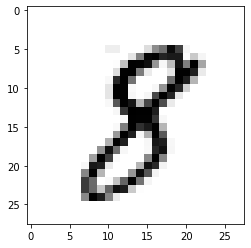

In [15]:
display_image(20)

In [17]:
kmeans_model = KMeans(n_clusters=10, max_iter=1000).fit(mnist_features)

In [19]:
kmeans_centroids = kmeans_model.cluster_centers_

kmeans_centroids

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
kmeans_centroids.shape

(10, 784)

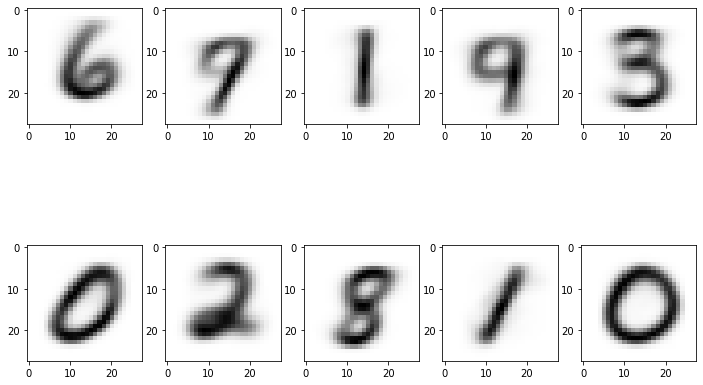

In [22]:
fig, ax =  plt.subplots(figsize=(12,8))

for centroid in range(len(kmeans_centroids)):
    plt.subplot(2, 5, centroid+1 )
    plt.imshow(kmeans_centroids[centroid].reshape(28,28),  cmap='Greys')

In [23]:
np.unique(kmeans_model.labels_)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [24]:
# test the data

mnist_test = mnist_data.sample(10, replace=False)

mnist_test_features = mnist_test.drop('label', axis=1)

mnist_test_labels = mnist_test['label']

In [25]:
mnist_test_labels

37595    6
36230    5
33054    6
27875    5
30984    6
31642    5
40034    6
27915    1
5069     3
41504    9
Name: label, dtype: int64

In [26]:
mnist_test_labels = np.array(mnist_test_labels)

mnist_test_labels

array([6, 5, 6, 5, 6, 5, 6, 1, 3, 9], dtype=int64)

In [27]:
pred_clusters = kmeans_model.predict(mnist_test_features)

In [28]:
pred_results = pd.DataFrame({'actual_digit': mnist_test_labels, 'pred_cluster': pred_clusters})

pred_results.head(10)

,actual_digit,pred_cluster
0,6,0
1,5,4
2,6,0
3,5,4
4,6,0
5,5,4
6,6,2
7,1,8
8,3,7
9,9,1


In [29]:
#indexnya liat di atas woy!!!

In [30]:
#using minibatch KMeans
minibatch_kmeans_model = MiniBatchKMeans(n_clusters= 10,  max_iter=10000, batch_size=100).fit(mnist_features)

In [32]:
minibatch_kmeans_centroids = minibatch_kmeans_model.cluster_centers_

minibatch_kmeans_centroids.shape

(10, 784)

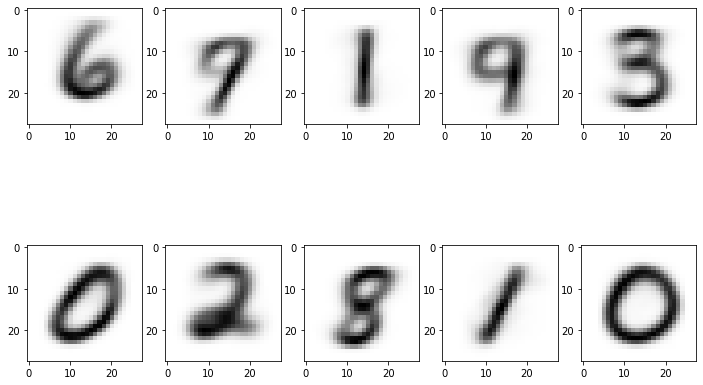

In [33]:
fig, ax =  plt.subplots(figsize=(12,8))

for centroid in range(len(minibatch_kmeans_centroids)):
    plt.subplot(2, 5, centroid+1 )
    plt.imshow(kmeans_centroids[centroid].reshape(28,28),  cmap='Greys')